In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [3]:
df = pd.read_csv("HousesalesRegressionDataset.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age_building
0,7129300520,10/13/2014,221900.0,3.0,1.0,1180,5650.0,1.0,0.0,0.0,...,1180,0.0,1955,0,98178,47.5112,-122.257,1340,5650,65
1,6414100192,12/9/2014,538000.0,3.0,NaN,2570,NaN,2.0,0.0,NaN,...,2170,400.0,1951,1991,98125,47.7210,NaN,1690,7639,69
2,5631500400,2/25/2015,180000.0,NaN,1.0,770,10000.0,1.0,0.0,NaN,...,770,NaN,1933,0,98028,47.7379,NaN,2720,8062,87
3,2487200875,12/9/2014,604000.0,4.0,NaN,1960,5000.0,NaN,0.0,0.0,...,1050,910.0,1965,0,98136,NaN,NaN,1360,5000,55
4,1954400510,2/18/2015,510000.0,NaN,2.0,1680,8080.0,1.0,0.0,NaN,...,1680,0.0,1987,0,98074,NaN,NaN,1800,7503,33


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         20919 non-null float64
bathrooms        21029 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21209 non-null float64
floors           21149 non-null float64
waterfront       20980 non-null float64
view             20587 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    20618 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              20360 non-null float64
long             20396 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
age_building     21597 non-null int64
dtypes: float64(10), int64(11), ob

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age_building
count,2.159700e+04,2.159700e+04,20919.000000,21029.000000,21597.000000,2.120900e+04,21149.000000,20980.000000,20587.000000,21597.000000,...,21597.000000,20618.000000,21597.000000,21597.000000,21597.000000,20360.000000,20396.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.374492,2.116066,2080.321850,1.507570e+04,1.495224,0.007579,0.234225,3.409825,...,1788.596842,290.964061,1970.999676,84.464787,98077.951845,47.560337,-122.214237,1986.620318,12758.283512,49.000324
std,2.876736e+09,3.673681e+05,0.928669,0.768761,918.106125,4.157822e+04,0.540121,0.086727,0.765734,0.650546,...,827.759761,441.932025,29.375234,401.821438,53.513072,0.138464,0.140859,685.230472,27274.441950,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,5.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.472300,-122.329000,1490.000000,5100.000000,23.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.603000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.572050,-122.231000,1840.000000,7620.000000,45.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.065000e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.677925,-122.125000,2360.000000,10083.000000,69.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,120.000000


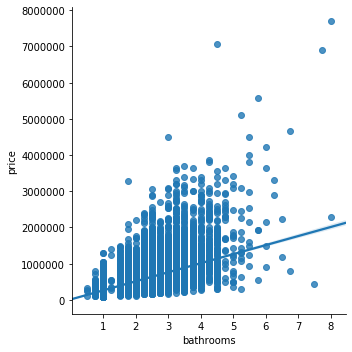

In [6]:
sns.lmplot(x='bathrooms',y='price',data=df)

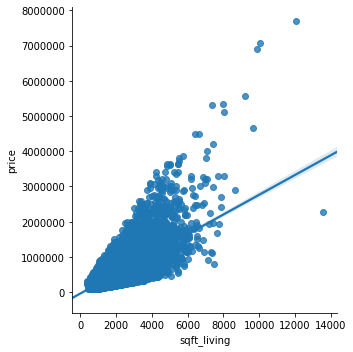

In [7]:
sns.lmplot(x='sqft_living',y='price',data=df)

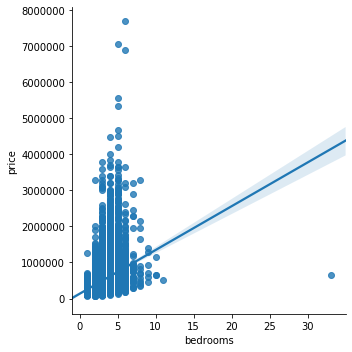

In [8]:
sns.lmplot(x='bedrooms',y='price',data=df)

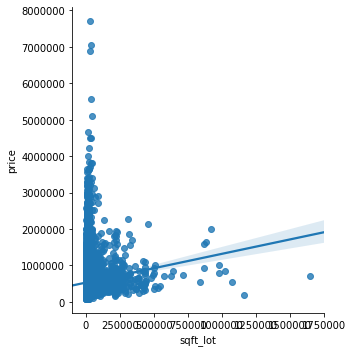

In [9]:
sns.lmplot(x='sqft_lot',y='price',data=df)

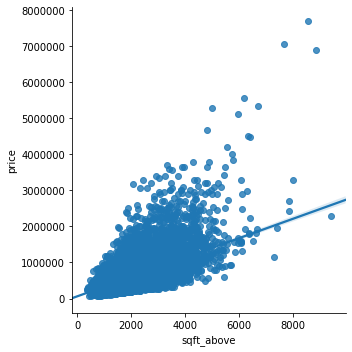

In [10]:
sns.lmplot(x='sqft_above',y='price',data=df)

In [11]:
df.isnull().sum().sum()


7126

#### 7000 and above missing cells which is more than 5% of the data.

In [12]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age_building'],
      dtype='object')

###### Dropping these columns as they are not important for regression 

In [13]:
df.drop(["id","date","zipcode","yr_built","yr_renovated"],axis=1,inplace=True)

In [14]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age_building
0,221900.0,3.0,1.0,1180,5650.0,1.0,0.0,0.0,3,7,1180,0.0,47.5112,-122.257,1340,5650,65
1,538000.0,3.0,NaN,2570,NaN,2.0,0.0,NaN,3,7,2170,400.0,47.7210,NaN,1690,7639,69
2,180000.0,NaN,1.0,770,10000.0,1.0,0.0,NaN,3,6,770,NaN,47.7379,NaN,2720,8062,87
3,604000.0,4.0,NaN,1960,5000.0,NaN,0.0,0.0,5,7,1050,910.0,NaN,NaN,1360,5000,55
4,510000.0,NaN,2.0,1680,8080.0,1.0,0.0,NaN,3,8,1680,0.0,NaN,NaN,1800,7503,33


# Handling Null values

##### Handling Bedroom nans

In [15]:
df['bedrooms'].value_counts()

3.0     9497
4.0     6667
2.0     2676
5.0     1564
6.0      263
1.0      191
7.0       37
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: bedrooms, dtype: int64

In [16]:
#imputing the mode as the value for nan since there are out liers in the data
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode().iloc[0])

#### imputing for Bathroom

In [17]:
df['bathrooms'].value_counts()

2.50    5226
1.00    3746
1.75    2967
2.25    1985
2.00    1878
1.50    1420
2.75    1166
3.00     734
3.50     711
3.25     574
3.75     155
4.00     132
4.50      96
4.25      77
0.75      66
4.75      23
5.00      19
5.25      13
5.50      10
1.25       8
6.00       5
5.75       4
0.50       4
8.00       2
6.25       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

In [18]:
#Imputing mode for the bathroom as it is categorical variable
df['bathrooms']=df['bathrooms'].fillna(df['bathrooms'].mode().iloc[0])

##### imputing values for sqft_lot

In [19]:
df["sqft_lot"].describe()

count    2.120900e+04
mean     1.507570e+04
std      4.157822e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.603000e+03
75%      1.065000e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

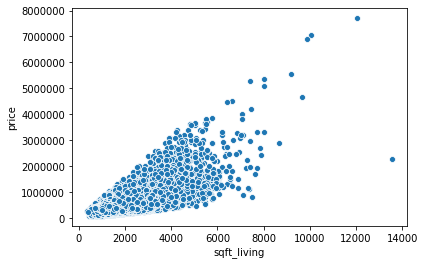

In [20]:
sns.scatterplot(x='sqft_living',y='price',data=df)

In [21]:
df["sqft_lot"]=df["sqft_lot"].fillna(df["sqft_lot"].median())

##### handling null values for Floors

In [22]:
df["floors"].describe()

count    21149.000000
mean         1.495224
std          0.540121
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [23]:
df["floors"]=df["floors"].fillna(df["floors"].median())

In [24]:
df["floors"].value_counts()

1.0    10435
2.0     8083
1.5     2312
3.0      602
2.5      158
3.5        7
Name: floors, dtype: int64

##### Imputing nulls in waterfront column

In [25]:
df["waterfront"].value_counts()

0.0    20821
1.0      159
Name: waterfront, dtype: int64

In [26]:
df["waterfront"]=df["waterfront"].fillna(df["waterfront"].mode().iloc[0])

##### Handling null values for View

In [27]:
df["view"].value_counts()

0.0    18560
2.0      919
3.0      482
1.0      322
4.0      304
Name: view, dtype: int64

In [28]:
df["view"]=df["view"].fillna(df["view"].mode().iloc[0])

In [29]:
df.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement     979
lat              1237
long             1201
sqft_living15       0
sqft_lot15          0
age_building        0
dtype: int64

##### handling Sqft_basement for nulls

In [30]:
df["sqft_basement"].describe()

count    20618.000000
mean       290.964061
std        441.932025
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [31]:
df["sqft_basement"]=df["sqft_basement"].fillna(df["sqft_basement"].median())

In [32]:
df.isnull().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
lat              1237
long             1201
sqft_living15       0
sqft_lot15          0
age_building        0
dtype: int64

##### Imputing for lat and long

In [33]:
#since the log and latitute are not imputable we are removing the columns. This column is not use ful for the regression
df.drop(["lat","long"],axis=1,inplace=True)

In [34]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,age_building
0,221900.0,3.0,1.0,1180,5650.0,1.0,0.0,0.0,3,7,1180,0.0,1340,5650,65
1,538000.0,3.0,2.5,2570,7603.0,2.0,0.0,0.0,3,7,2170,400.0,1690,7639,69
2,180000.0,3.0,1.0,770,10000.0,1.0,0.0,0.0,3,6,770,0.0,2720,8062,87
3,604000.0,4.0,2.5,1960,5000.0,1.5,0.0,0.0,5,7,1050,910.0,1360,5000,55
4,510000.0,3.0,2.0,1680,8080.0,1.0,0.0,0.0,3,8,1680,0.0,1800,7503,33


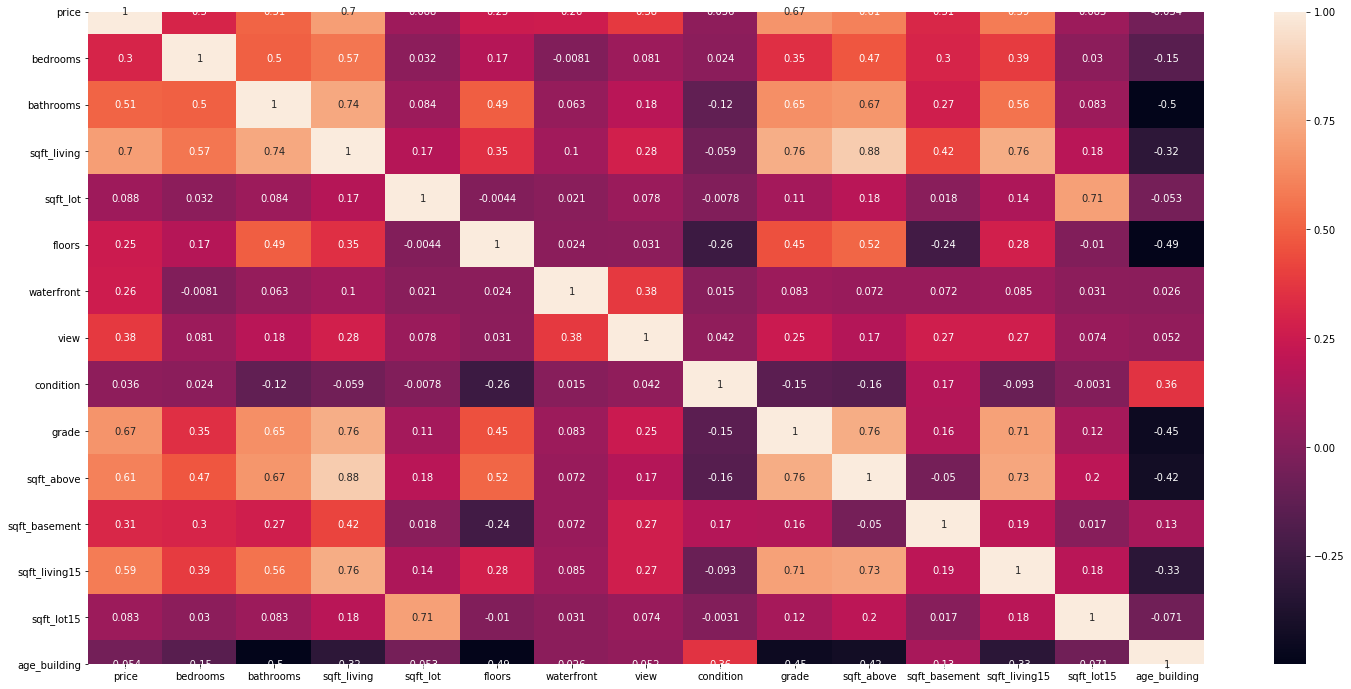

In [35]:
corr=df.corr()
a4_dims = (25,12)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(corr,annot=True)

###### This chart explains the correlation of the variables in the dataset. 

In [36]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_living15    0
sqft_lot15       0
age_building     0
dtype: int64

In [37]:
df_final = df.sample(n=1600,random_state=0)

# Splitting train test data

In [38]:
#Spliting the data for train and test 
X = df_final.drop(['price'],axis=1)
Y = df_final['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

### Scaling data

In [39]:
#StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)

# Linear Regression

In [40]:
from sklearn.model_selection import GridSearchCV
model = LinearRegression()
parameters = {'normalize':[True,False]}
grid_search_lr = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search_lr.fit(X_train_scaled, y_train)
print("Best parameters: {}".format(grid_search_lr.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_lr.best_score_))

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None, param_grid={'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'normalize': True}
Best cross-validation score: 0.6271


In [41]:
results = pd.DataFrame(grid_search_lr.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.001459,0.000522,0.000596,0.000431,True,{'normalize': True},0.61311,0.731869,0.608696,0.649457,...,0.054168,1,0.656014,0.630407,0.661601,0.648753,0.674487,0.656298,0.654593,0.013347
1,0.001520,0.000404,0.000812,0.000392,False,{'normalize': False},0.61311,0.731869,0.608696,0.649457,...,0.054168,1,0.656014,0.630407,0.661601,0.648753,0.674487,0.656298,0.654593,0.013347


In [42]:
lreg = LinearRegression(normalize = True)
lreg.fit(X_train_scaled, y_train)
print("Train score:",lreg.score(X_train_scaled, y_train))
print("Test score:",lreg.score(X_test_scaled, y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Train score: 0.6528506809785037
Test score: 0.6765165394748482


In [43]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=10)
print("Cross-validation scores:",cross_val_score(model , X_train_scaled, y_train, cv=kfold))
scores = cross_val_score(model , X_train_scaled, y_train, cv=kfold)
testscores= cross_val_score(model , X_test_scaled, y_test, cv=kfold)
print(np.mean(scores))
print(np.mean(testscores))

Cross-validation scores: [0.66182373 0.54670168 0.75929092 0.62929461 0.60028234 0.67853562
 0.54635855 0.55279378 0.57548276 0.62376326]
0.6174327250999959
0.6227094200171737


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

Text(0.5, 0, 'sqft_living')

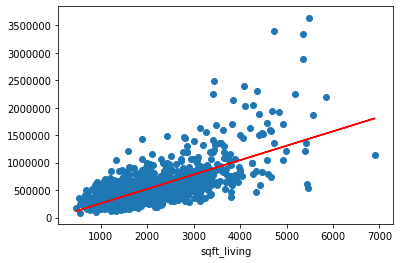

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

X_train_array = X_train.to_numpy()
X_train_rm = X_train_array[:,2].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)
plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('sqft_living')

##### Best cross-validation score: 0.6264

train score: 0.656
Test score: 0.675

# Ridge regression

In [45]:
ridge = Ridge()
grid_parameter_ridge = {'alpha': [0.01, 0.1, 1, 10, 100,1000]}
grid_search_ridge = GridSearchCV(ridge,param_grid = grid_parameter_ridge,return_train_score=True,cv=5)
grid_search_ridge.fit(X_train_scaled, y_train)
print("Best parameters: ",grid_search_ridge.best_params_)
print("Best cross-validation score: ",grid_search_ridge.best_score_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters:  {'alpha': 10}
Best cross-validation score:  0.6211435309806874


In [46]:
ridge_Regressor = Ridge(alpha = 10)
ridge_Regressor.fit(X_train_scaled, y_train)
print("Train score:",ridge_Regressor.score(X_train_scaled, y_train))
print("Test Score: ", ridge_Regressor.score(X_test_scaled, y_test))

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

Train score: 0.6519008427693769
Test Score:  0.678780092072488


In [47]:
#cross validation

kfold_ridge = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(ridge_Regressor , X_train_scaled, y_train, cv=kfold)))
scores = cross_val_score(ridge_Regressor , X_train_scaled, y_train, cv=kfold)
print("mean score for cross validation:",np.mean(scores))

Cross-validation scores:
[0.66019122 0.54852827 0.75594447 0.63913798 0.60173377 0.6840547
 0.54733953 0.55902838 0.57606274 0.60962208]
mean score for cross validation: 0.6181643150005599


In [48]:
#grid parameters
result_ridge=pd.DataFrame(grid_search_ridge.cv_results_)
print(result_ridge)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.001382      0.000400         0.000767        0.000389        0.01   
1       0.001542      0.000396         0.001021        0.000037         0.1   
2       0.001930      0.000081         0.001520        0.000464           1   
3       0.001904      0.000475         0.001287        0.000592          10   
4       0.001994      0.000026         0.001409        0.000487         100   
5       0.001842      0.000214         0.001113        0.000470        1000   

            params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.01}           0.606688           0.715742           0.625616   
1   {'alpha': 0.1}           0.606676           0.715953           0.625835   
2     {'alpha': 1}           0.606571           0.717481           0.627477   
3    {'alpha': 10}           0.606477           0.718538           0.630112   
4   {'alpha': 100}           0.607496           0.7

([<matplotlib.axis.XTick at 0x1fc6e1a17c8>,
 <a list of 6 Text xticklabel objects>)

Text(0.5, 0, 'Alpha')

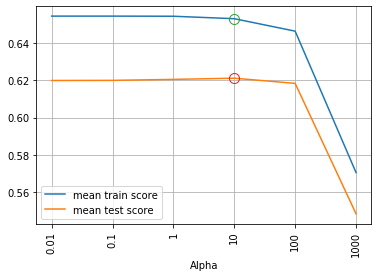

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(result_ridge.shape[0]), result_ridge['mean_train_score'], label = 'mean train score')
plt.plot(range(result_ridge.shape[0]), result_ridge['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_ridge.shape[0]), result_ridge['param_alpha'], rotation = 90)
plt.plot([grid_search_ridge.best_index_], result_ridge['mean_train_score'][grid_search_ridge.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_search_ridge.best_index_], result_ridge['mean_test_score'][grid_search_ridge.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

###### Best cross-validation score:  0.627
Train score: 0.655
Test Score:  0.677

# Lasso Regressor

In [51]:
grid_parameters_lasso = {'alpha': [0.01, 0.1, 1, 10,100,1000]}
lassoRegressor = Lasso(max_iter=1500)
grid_search_lassoReg = GridSearchCV(estimator = lassoRegressor,param_grid = grid_parameters_lasso,return_train_score=True,cv=5)
grid_search_lassoReg.fit(X_train_scaled, y_train)
print("Best parameters: ",grid_search_lassoReg.best_params_)
print("Best cross-validation score:",grid_search_lassoReg.best_score_)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1500, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters:  {'alpha': 1000}
Best cross-validation score: 0.6207128546224523


In [52]:
lasso_Regressor1 = Lasso(alpha = 100)
lasso_Regressor1.fit(X_train_scaled, y_train)
print("Train Score:",lasso_Regressor1.score(X_train_scaled, y_train))
print("Test Score:",lasso_Regressor1.score(X_test_scaled, y_test))

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

Train Score: 0.6528237087845414
Test Score: 0.6769644413478716


In [53]:
#Cross Validation
kfold_lasso = KFold(n_splits=10)
print("Cross-validation scores:\n",cross_val_score(lasso_Regressor1 , X_train_scaled, y_train, cv=kfold))
scores = cross_val_score(lasso_Regressor1 , X_train_scaled, y_train, cv=kfold)
print("average score:",np.mean(scores))

Cross-validation scores:
 [0.66158108 0.54649563 0.75900688 0.63128322 0.6004051  0.68043359
 0.54658709 0.55349111 0.57565291 0.62120842]
average score: 0.6176145027115537


In [54]:
#grid parameters
lassoReg_result=pd.DataFrame(grid_search_lassoReg.cv_results_)
print(lassoReg_result)

   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.011264      0.003064         0.000768        0.000386        0.01   
1       0.010031      0.002935         0.001139        0.000511         0.1   
2       0.011221      0.004025         0.001039        0.000081           1   
3       0.008805      0.003224         0.001167        0.000335          10   
4       0.005975      0.001668         0.001228        0.000391         100   
5       0.003078      0.000185         0.001336        0.000387        1000   

            params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.01}           0.606689           0.715717           0.625591   
1   {'alpha': 0.1}           0.606689           0.715719           0.625592   
2     {'alpha': 1}           0.606687           0.715729           0.625602   
3    {'alpha': 10}           0.606661           0.715831           0.625692   
4   {'alpha': 100}           0.606399           0.7

###### Best cross-validation score: 0.62648

Train Score: 0.656
Test Score: 0.675

# Polynomial Regression

In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [56]:
param_grid_poly = {'polynomialfeatures__degree': np.arange(3)}

grid_poly = GridSearchCV(PolynomialRegression(), param_grid_poly,return_train_score=True,n_jobs=-1,cv=5)

In [57]:
grid_poly.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'polynomialfeatures__degree': array([0, 1, 2])},
             pre_dispatch='

In [58]:
print("Best parameters:",grid_poly.best_params_)
print("Best cross-validation score: ",grid_poly.best_score_)

Best parameters: {'polynomialfeatures__degree': 1}
Best cross-validation score:  0.6198992773751041


In [59]:
pol = PolynomialFeatures(degree = 1)
X_pol = pol.fit_transform(X_train_scaled)
Xt_pol = pol.fit_transform(X_test_scaled)
pol_reg = LinearRegression()
pol_reg.fit(X_pol,y_train)
print("Train Score:",pol_reg.score(X_pol, y_train))
print("Test score:" ,pol_reg.score(Xt_pol, y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Train Score: 0.6528506809785037
Test score: 0.6765165394748482


In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

  
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(cross_val_score(pol_reg , X_pol, y_train, cv=kfold)))
scores = cross_val_score(pol_reg , X_pol, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.66182373 0.54670168 0.75929092 0.62929461 0.60028234 0.67853562
 0.54635855 0.55279378 0.57548276 0.62376326]
0.6174327250999958


In [61]:
result_poly = pd.DataFrame(grid_poly.cv_results_)
result_poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006392,0.001030,0.002194,0.000399,0,{'polynomialfeatures__degree': 0},-3.059033e-02,-1.459342e-02,-1.534805e-02,-4.421730e-03,...,-1.403640e-02,9.445472e-03,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.012203,0.002638,0.002826,0.000767,1,{'polynomialfeatures__degree': 1},6.066895e-01,7.157174e-01,6.255914e-01,5.499848e-01,...,6.198993e-01,5.406307e-02,1,0.657610,0.629769,0.651165,0.673286,0.660715,0.654509,0.014310
2,0.023867,0.008541,0.005846,0.002036,2,{'polynomialfeatures__degree': 2},-3.100133e+18,-7.861143e+21,-7.767148e+19,-2.002185e+22,...,-5.592753e+21,7.826667e+21,3,0.802902,0.789929,0.780882,0.814879,0.802135,0.798145,0.011697


([<matplotlib.axis.XTick at 0x1fc711bf948>,
 <a list of 3 Text xticklabel objects>)

Text(0.5, 0, 'Degree')

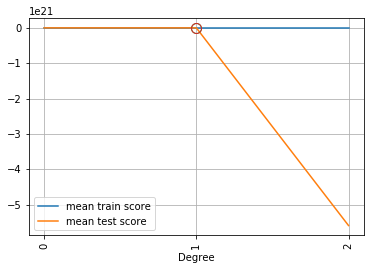

In [62]:
plt.plot(range(result_poly.shape[0]), result_poly['mean_train_score'], label = 'mean train score')
plt.plot(range(result_poly.shape[0]), result_poly['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_poly.shape[0]), result_poly['param_polynomialfeatures__degree'], rotation = 90)
plt.plot([grid_poly.best_index_], result_poly['mean_train_score'][grid_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_poly.best_index_], result_poly['mean_test_score'][grid_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.xlabel('Degree')
plt.legend()

##### Best cross-validation score: 0.6264

Train Score: 0.656
Test score: 0.675

# Linear SVR

In [63]:
grid_parms_svrl = {'C': [0.01, 0.1, 1, 10, 100], 'epsilon' : [0.01, 0.1, 1, 10, 100]}
linearsvr = LinearSVR()
grid_svrl = GridSearchCV(estimator = linearsvr,param_grid = grid_parms_svrl,return_train_score=True,n_jobs= -1,cv=10)
grid_svrl.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                 fit_intercept=True, intercept_scaling=1.0,
                                 loss='epsilon_insensitive', max_iter=1000,
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'epsilon': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [64]:
print("Best parameters: {}".format(grid_svrl.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svrl.best_score_))

Best parameters: {'C': 100, 'epsilon': 0.1}
Best cross-validation score: -1.6033


In [65]:
lsvr = LinearSVR(C = 100, epsilon = 100)
        
lsvr.fit(X_train_scaled, y_train)

print(lsvr.score(X_train_scaled, y_train))
print(lsvr.score(X_test_scaled, y_test))

LinearSVR(C=100, dual=True, epsilon=100, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

-1.3840267483660744
-1.3355419200083096


In [66]:
lsvr = LinearSVR(C = 100, epsilon = 100)
        
lsvr.fit(X_train_scaled, y_train)

print("Train Score:",lsvr.score(X_train_scaled, y_train))
print("Test Score",lsvr.score(X_test_scaled, y_test))

LinearSVR(C=100, dual=True, epsilon=100, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

Train Score: -1.3840267483660744
Test Score -1.3355419200083096


In [67]:
result_linearsvr = pd.DataFrame(grid_svrl.cv_results_)
result_linearsvr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001900,0.000371,0.000854,0.000434,0.01,0.01,"{'C': 0.01, 'epsilon': 0.01}",-2.660054,-3.203554,-1.881664,...,-2.399062,-2.250357,-2.408904,-2.330488,-2.345606,-2.254158,-2.343120,-2.259438,-2.313703,0.057831
1,0.001990,0.000576,0.001314,0.000466,0.01,0.1,"{'C': 0.01, 'epsilon': 0.1}",-2.660054,-3.203554,-1.881664,...,-2.399062,-2.250357,-2.408904,-2.330488,-2.345606,-2.254158,-2.343120,-2.259438,-2.313703,0.057831
2,0.002307,0.000472,0.001597,0.000489,0.01,1,"{'C': 0.01, 'epsilon': 1}",-2.660054,-3.203554,-1.881664,...,-2.399062,-2.250357,-2.408904,-2.330488,-2.345606,-2.254158,-2.343120,-2.259438,-2.313703,0.057831
3,0.002651,0.000529,0.001405,0.000494,0.01,10,"{'C': 0.01, 'epsilon': 10}",-2.660054,-3.203554,-1.881664,...,-2.399062,-2.250357,-2.408904,-2.330488,-2.345606,-2.254158,-2.343120,-2.259438,-2.313703,0.057831
4,0.002186,0.000679,0.001440,0.000495,0.01,100,"{'C': 0.01, 'epsilon': 100}",-2.660054,-3.203554,-1.881664,...,-2.399062,-2.250357,-2.408904,-2.330488,-2.345606,-2.254158,-2.343120,-2.259438,-2.313703,0.057831
5,0.002822,0.000449,0.001777,0.000307,0.1,0.01,"{'C': 0.1, 'epsilon': 0.01}",-2.659001,-3.202346,-1.881081,...,-2.398192,-2.249546,-2.408074,-2.329642,-2.344731,-2.253329,-2.342252,-2.258626,-2.312864,0.057814
6,0.002252,0.000601,0.001416,0.000474,0.1,0.1,"{'C': 0.1, 'epsilon': 0.1}",-2.659001,-3.202346,-1.881081,...,-2.398192,-2.249546,-2.408074,-2.329642,-2.344731,-2.253329,-2.342252,-2.258626,-2.312864,0.057814
7,0.002701,0.000444,0.001905,0.000309,0.1,1,"{'C': 0.1, 'epsilon': 1}",-2.659001,-3.202346,-1.881081,...,-2.398192,-2.249546,-2.408074,-2.329642,-2.344731,-2.253329,-2.342252,-2.258626,-2.312864,0.057814
8,0.002793,0.000399,0.001620,0.000411,0.1,10,"{'C': 0.1, 'epsilon': 10}",-2.659001,-3.202346,-1.881081,...,-2.398192,-2.249546,-2.408074,-2.329642,-2.344731,-2.253329,-2.342252,-2.258626,-2.312864,0.057814
9,0.003146,0.000516,0.001581,0.000453,0.1,100,"{'C': 0.1, 'epsilon': 100}",-2.659001,-3.202346,-1.881081,...,-2.398192,-2.249546,-2.408074,-2.329642,-2.344731,-2.253329,-2.342252,-2.258626,-2.312864,0.057814


([<matplotlib.axis.XTick at 0x1fc715c26c8>,
 <a list of 25 Text xticklabel objects>)

Text(0.5, 0, 'Alpha')

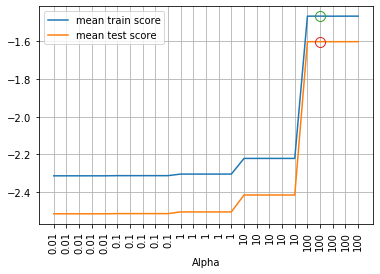

In [68]:
plt.plot(range(result_linearsvr.shape[0]), result_linearsvr['mean_train_score'], label = 'mean train score')
plt.plot(range(result_linearsvr.shape[0]), result_linearsvr['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_linearsvr.shape[0]), result_linearsvr['param_C'], rotation = 90)
plt.plot([grid_svrl.best_index_], result_linearsvr['mean_train_score'][grid_svrl.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svrl.best_index_], result_linearsvr['mean_test_score'][grid_svrl.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('Alpha')

# SVR with Kernal Linear

In [69]:
grid_parms_linear = {'C': [0.01,0.1, 1, 10, 100]}
svr_linear = SVR(kernel='linear')
grid_svr_linear = GridSearchCV(estimator = svr_linear,param_grid = grid_parms_linear,return_train_score=True,n_jobs= -1,cv=6)
grid_svr_linear.fit(X_train_scaled,y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1, param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [70]:
print("Best parameters: {}".format(grid_svr_linear.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_linear.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.3720


In [71]:
svr = SVR(kernel = 'linear',C = 100)
        
        #train the model
svr.fit(X_train_scaled, y_train)
        
        #evaluate the model
print(svr.score(X_train_scaled, y_train))
print(svr.score(X_test_scaled, y_test))

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

0.4027641864434791
0.39561981845329325


In [72]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr , X_train_scaled, y_train, cv=kfold)))
scores = cross_val_score(svr , X_train_scaled, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.42850145 0.35020299 0.35352144 0.32582167 0.34907784 0.42509224]
0.37203627203489686


In [73]:
result_svr_linear = pd.DataFrame(grid_svr_linear.cv_results_)
result_svr_linear

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.085470,0.011406,0.006599,0.000632,0.01,{'C': 0.01},-0.018211,-0.087576,-0.094115,-0.087134,...,0.032388,5,-0.057566,-0.056496,-0.049689,-0.056983,-0.052289,-0.052871,-0.054316,0.002888
1,0.080394,0.005729,0.007664,0.001221,0.1,{'C': 0.1},-0.017043,-0.086606,-0.093261,-0.086175,...,0.032472,4,-0.056466,-0.055488,-0.048886,-0.055962,-0.051233,-0.051865,-0.053317,0.002820
2,0.090586,0.001738,0.009013,0.000808,1,{'C': 1},-0.006381,-0.076116,-0.083525,-0.075952,...,0.032660,3,-0.046817,-0.044731,-0.039859,-0.045277,-0.040723,-0.041862,-0.043212,0.002544
3,0.091277,0.002721,0.008724,0.000734,10,{'C': 10},0.088129,0.005887,-0.001529,0.001106,...,0.036549,2,0.040143,0.040025,0.036456,0.038857,0.041698,0.034691,0.038645,0.002378
4,0.079262,0.014546,0.008669,0.001421,100,{'C': 100},0.428501,0.350203,0.353521,0.325822,...,0.039761,1,0.374193,0.362394,0.372085,0.374377,0.387885,0.374779,0.374286,0.007433


([<matplotlib.axis.XTick at 0x1fc711a7988>,
 <a list of 5 Text xticklabel objects>)

Text(0.5, 0, 'C')

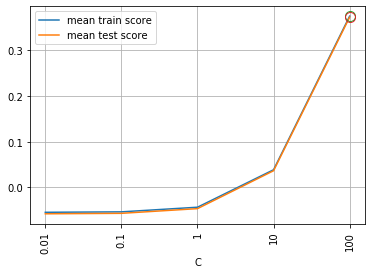

In [74]:
plt.plot(range(result_svr_linear.shape[0]), result_svr_linear['mean_train_score'], label = 'mean train score')
plt.plot(range(result_svr_linear.shape[0]), result_svr_linear['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr_linear.shape[0]), result_svr_linear['param_C'], rotation = 90)
plt.plot([grid_svr_linear.best_index_], result_svr_linear['mean_train_score'][grid_svr_linear.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_linear.best_index_], result_svr_linear['mean_test_score'][grid_svr_linear.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()
plt.xlabel('C')

###### Best cross-validation score: 0.3716

train score: 0.401
test score: 0.394

# SVR with Kernal 'Poly'

In [75]:
grid_parms_svrp = {'C': [1, 10, 100],'degree':[1,3]}
svr_poly = SVR(kernel='poly')
grid_svr_poly = GridSearchCV(estimator = svr_poly,param_grid = grid_parms_svrp,return_train_score=True,n_jobs= -1,cv=3)
grid_svr_poly.fit(X_train_scaled,y_train)
print("Best parameters: {}".format(grid_svr_poly.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_poly.best_score_))


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='poly',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [1, 10, 100], 'degree': [1, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'C': 100, 'degree': 3}
Best cross-validation score: 0.0755


In [100]:
svr_poly = SVR(kernel='poly',C=100,degree = 3, gamma='scale')
svr_poly.fit(X_train_scaled, y_train)
print("Train Score",svr_poly.score(X_train_scaled, y_train))
print("Test Score",svr_poly.score(X_test_scaled, y_test))

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Train Score 0.15377538207053698
Test Score 0.1522894889741102


In [101]:
#scores = cross_val_score(logreg, iris.data, iris.target)
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(cross_val_score(svr_poly, X_train_scaled, y_train,cv=kfold)))
scores = cross_val_score(svr_poly, X_train_scaled, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.13670693 0.06080601 0.05431213 0.05331353 0.13932685 0.22159159
 0.07238677 0.15109229 0.07601823 0.07010085]
0.10356551728529761


In [79]:
result_svr_poly= pd.DataFrame(grid_svr_poly.cv_results_)
result_svr_poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.084139,0.005104,0.018382,0.002018,1,1,"{'C': 1, 'degree': 1}",-0.048424,-0.098585,-0.022381,-0.056463,0.031625,6,-0.057220,-0.051496,-0.050406,-0.053041,0.002989
1,0.088599,0.001181,0.018285,0.001243,1,3,"{'C': 1, 'degree': 3}",-0.046659,-0.096431,-0.022363,-0.055151,0.030829,5,-0.055045,-0.050014,-0.047699,-0.050919,0.003066
2,0.088681,0.014969,0.016953,0.000079,10,1,"{'C': 10, 'degree': 1}",-0.043930,-0.092698,-0.016953,-0.051194,0.031346,4,-0.052819,-0.045764,-0.044748,-0.047777,0.003589
3,0.091948,0.014491,0.018723,0.003703,10,3,"{'C': 10, 'degree': 3}",-0.027080,-0.074120,-0.011886,-0.037695,0.026492,3,-0.031673,-0.034856,-0.015939,-0.027490,0.008270
4,0.063169,0.003629,0.014054,0.003004,100,1,"{'C': 100, 'degree': 1}",0.010201,-0.044077,0.028813,-0.001688,0.030922,2,0.000895,0.002654,0.001916,0.001822,0.000721
5,0.072465,0.000440,0.018031,0.000077,100,3,"{'C': 100, 'degree': 3}",0.086931,0.063135,0.076542,0.075536,0.009741,1,0.123424,0.060459,0.141228,0.108370,0.034650


([<matplotlib.axis.XTick at 0x1fc7153a488>,
 <a list of 6 Text xticklabel objects>)

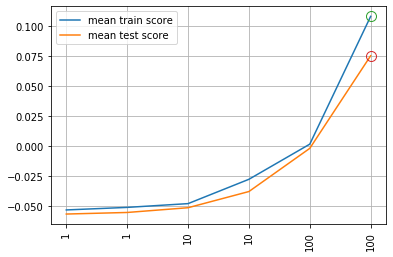

In [80]:
plt.plot(range(result_svr_poly.shape[0]), result_svr_poly['mean_train_score'], label = 'mean train score')
plt.plot(range(result_svr_poly.shape[0]), result_svr_poly['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr_poly.shape[0]), result_svr_poly['param_C'], rotation = 90)
plt.plot([grid_svr_poly.best_index_], result_svr_poly['mean_train_score'][grid_svr_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_poly.best_index_], result_svr_poly['mean_test_score'][grid_svr_poly.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()

###### Best cross-validation score: 0.0800

Train Score 0.1602
Test Score 0.1601

# SVR Kernal with 'rbf'

In [81]:
grid_parms_rbf = {'C': [0.1, 1, 10, 100],'gamma':[0.1, 1, 10, 100]}
svr_rbf = SVR(kernel='rbf')
grid_svr_rbf = GridSearchCV(estimator = svr_rbf,param_grid = grid_parms_rbf,return_train_score=True,n_jobs= -1,cv=3)
grid_svr_rbf.fit(X_train_scaled,y_train)
print("Best parameters: {}".format(grid_svr_rbf.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_svr_rbf.best_score_))

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: -0.0451


In [82]:
svr_rbf = SVR(kernel='rbf',C=100,gamma=0.1)
svr_rbf.fit(X_train_scaled, y_train)
print("Train Score:",svr_rbf.score(X_train_scaled, y_train))
print("test score :",svr_rbf.score(X_test_scaled, y_test))

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Train Score: -0.03461011532256597
test score : -0.035560550425788096


In [83]:
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svr_rbf, X_train_scaled, y_train, cv=kfold)))
scores = cross_val_score(svr_rbf, X_train_scaled, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[ 0.00252779 -0.07154216 -0.08098662 -0.07132411 -0.01968508 -0.0025061 ]
-0.040586047054141004


In [84]:
result_rbf = pd.DataFrame(grid_svr_rbf.cv_results_)
result_rbf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.062876,0.001653,0.026960,5.359964e-03,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",-0.048916,-0.099250,-0.023002,-0.057056,0.031656,6,-0.057703,-0.052140,-0.051066,-0.053636,0.002909
1,0.076494,0.011632,0.024618,4.821030e-04,0.1,1,"{'C': 0.1, 'gamma': 1}",-0.048925,-0.099263,-0.023014,-0.057068,0.031656,10,-0.057710,-0.052152,-0.051079,-0.053647,0.002906
2,0.086796,0.001424,0.029136,6.067987e-04,0.1,10,"{'C': 0.1, 'gamma': 10}",-0.048926,-0.099264,-0.023015,-0.057068,0.031656,12,-0.057711,-0.052153,-0.051080,-0.053648,0.002906
3,0.161344,0.003848,0.064827,4.899036e-07,0.1,100,"{'C': 0.1, 'gamma': 100}",-0.048926,-0.099264,-0.023015,-0.057068,0.031656,13,-0.057711,-0.052153,-0.051080,-0.053648,0.002906
4,0.089394,0.002488,0.026540,4.125567e-04,1,0.1,"{'C': 1, 'gamma': 0.1}",-0.048835,-0.099127,-0.022884,-0.056949,0.031650,4,-0.057627,-0.052015,-0.050942,-0.053528,0.002931
5,0.090663,0.001356,0.026404,3.353455e-04,1,1,"{'C': 1, 'gamma': 1}",-0.048920,-0.099255,-0.023007,-0.057061,0.031656,8,-0.057702,-0.052141,-0.051070,-0.053638,0.002907
6,0.109448,0.002216,0.030377,4.761507e-04,1,10,"{'C': 1, 'gamma': 10}",-0.048926,-0.099264,-0.023015,-0.057068,0.031656,11,-0.057708,-0.052150,-0.051076,-0.053645,0.002907
7,0.157643,0.003382,0.059030,2.179524e-03,1,100,"{'C': 1, 'gamma': 100}",-0.048926,-0.099264,-0.023015,-0.057069,0.031656,14,-0.057709,-0.052150,-0.051077,-0.053645,0.002907
8,0.073387,0.002394,0.026381,4.585966e-04,10,0.1,"{'C': 10, 'gamma': 0.1}",-0.048023,-0.097889,-0.021705,-0.055872,0.031594,2,-0.056867,-0.050765,-0.049703,-0.052445,0.003156
9,0.078401,0.005038,0.024714,2.881244e-03,10,1,"{'C': 10, 'gamma': 1}",-0.048869,-0.099175,-0.022933,-0.056993,0.031651,5,-0.057621,-0.052026,-0.050976,-0.053541,0.002917


([<matplotlib.axis.XTick at 0x1fc70f91888>,
 <a list of 6 Text xticklabel objects>)

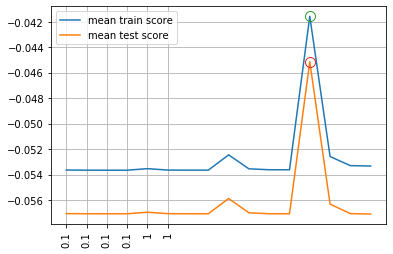

In [85]:
plt.plot(range(result_rbf.shape[0]), result_rbf['mean_train_score'], label = 'mean train score')
plt.plot(range(result_rbf.shape[0]), result_rbf['mean_test_score'], label = 'mean test score')
plt.xticks(range(result_svr_poly.shape[0]), result_rbf['param_C'], rotation = 90)
plt.plot([grid_svr_rbf.best_index_], result_rbf['mean_train_score'][grid_svr_rbf.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.plot([grid_svr_rbf.best_index_], result_rbf['mean_test_score'][grid_svr_rbf.best_index_], 'o', markersize = 10, fillstyle = "none")
plt.grid()
plt.legend()

# KNN Regressor

In [86]:
grid_parms_knn = {'n_neighbors':[1,5,10,15,20]}
knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(knn, grid_parms_knn,cv=6,return_train_score=True,n_jobs= -1)
grid_search_knn.fit(X_train_scaled, y_train)
print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.4f}".format(grid_search_knn.best_score_))

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'n_neighbors': 10}
Best cross-validation score: 0.5639


In [87]:
knn = KNeighborsRegressor(n_neighbors = 10)
knn.fit(X_train_scaled, y_train)
print("Train Score",knn.score(X_train_scaled, y_train))
print("Test score",knn.score(X_test_scaled, y_test))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

Train Score 0.6673771909652735
Test score 0.6265144863146073


In [88]:
knn_result=pd.DataFrame(grid_search_knn.cv_results_)
knn_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,mean_train_score,std_train_score
0,0.003242,0.000542,0.011801,0.000372,1,{'n_neighbors': 1},0.283850,0.508983,0.389623,0.504573,...,0.083582,5,0.999431,0.999372,1.000000,0.999399,0.999371,1.000000,0.999596,0.000287
1,0.003324,0.000470,0.014470,0.001484,5,{'n_neighbors': 5},0.545722,0.569096,0.510119,0.513661,...,0.035578,2,0.740027,0.712660,0.763519,0.716128,0.743867,0.747299,0.737250,0.017764
2,0.003988,0.001153,0.015014,0.001005,10,{'n_neighbors': 10},0.584744,0.551228,0.559737,0.573977,...,0.013333,1,0.665164,0.650920,0.668904,0.668061,0.659302,0.659986,0.662056,0.006171
3,0.004219,0.000422,0.022099,0.001018,15,{'n_neighbors': 15},0.592247,0.551486,0.555396,0.525062,...,0.021847,3,0.632703,0.609417,0.632503,0.637721,0.629059,0.633736,0.629190,0.009199
4,0.003672,0.000476,0.018393,0.002314,20,{'n_neighbors': 20},0.596116,0.535280,0.540844,0.527506,...,0.024660,4,0.605043,0.581554,0.602809,0.607950,0.607158,0.604257,0.601462,0.009068


In [89]:
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train_scaled, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train_scaled, y_train, cv=kfold)
print("Mean score for Kfold",np.mean(scores))

Cross-validation scores:
[0.58474363 0.55122844 0.55973742 0.57397657 0.56792865 0.54555679]
Mean score for Kfold 0.5638619140236186


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Text(0.5, 0, 'sqft_living')

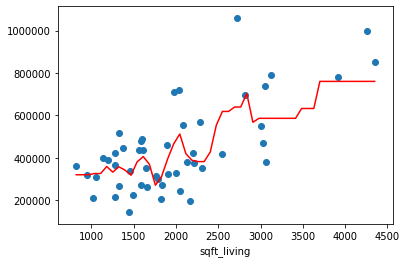

In [90]:
X_b = X_train_array[:50,2].reshape(-1,1)
y_b = y_train[:50]

knn_reg = KNeighborsRegressor(5)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)
plt.xlabel('sqft_living')

###### Train Score 0.672 Test score 0.630

Best cross-validation score: 0.5677
Best parameters: {'C': 100, 'gamma': 0.1}

# Decision Tree

In [91]:
from sklearn.tree import DecisionTreeRegressor

dtree_clf = DecisionTreeRegressor(random_state=0)
parameters = { 'max_depth' : [1,2,3,4,5,6,7,8,9,10]}

In [92]:
grid_search = GridSearchCV(dtree_clf,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train_scaled, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=0,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

Best parameters: {'max_depth': 5}
Best cross-validation score: 0.54


In [93]:
dtree = DecisionTreeRegressor(max_depth=6, random_state=0)
dtree.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_scaled, y_test)))

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

Accuracy on training set: 0.846
Accuracy on test set: 0.613


In [94]:
d = {'Model': ['Linear Regression', 'KNN Regression','Ridge Regression','Lasso Regression','Polynominal Regression','Simple SVR','SVR with Linear kernel','SVR with Poly kernel','SVR with rbf kernel','DecissiontreeeRegressor'], 
     'Cross-Validation Score': [grid_search_lr.best_score_, grid_search_knn.best_score_,grid_search_ridge.best_score_,grid_search_lassoReg.best_score_,grid_poly.best_score_,grid_svrl.best_score_,grid_svr_linear.best_score_,grid_svr_poly.best_score_,grid_svr_rbf.best_score_,grid_search.best_score_]}

In [95]:
result = pd.DataFrame(data=d)
result

,Model,Cross-Validation Score
0,Linear Regression,0.627119
1,KNN Regression,0.563862
2,Ridge Regression,0.621144
3,Lasso Regression,0.620713
4,Polynominal Regression,0.619899
5,Simple SVR,-1.603319
6,SVR with Linear kernel,0.372036
7,SVR with Poly kernel,0.075536
8,SVR with rbf kernel,-0.045131
9,DecissiontreeeRegressor,0.540234


### Using Ridge Regressor to predict for X_test dataset

Ridge regressor does a great job for this housing sales prediction dataset.

In [99]:
ridge = Ridge(alpha = 1)
ridge.fit(X_train_scaled, y_train)
prediction=ridge.predict(X_test_scaled)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [97]:
prediction

array([ 405802.58269262,  376478.30866045,  649970.96665651,
        523619.97558138,  646663.9649331 , 1189576.36318843,
        302201.56567678,  730687.67898737,  312313.18963024,
        461907.8845923 ,  549728.16595544,  399238.95424559,
        514915.15084464,  257437.96935378,  349604.50095507,
        193213.02703543,  272367.44207562,  327813.19431077,
        396288.72359334,  301128.42103408,  721842.88683599,
        295802.50408243,  695405.357625  ,  651529.64491668,
        329721.09481855,  476393.27728355,  501907.22485072,
        644089.76399193,  316022.18920088,  448896.11312823,
        450353.04826371,  276408.98885815,  289395.49401699,
        809897.15706616,  468281.73327496,  370333.05202358,
        455868.15276118,  628718.49036436,  664893.13636015,
        339012.28418212,  842879.02104845,  625518.62426035,
        682539.49018441,  278567.48124428,  631959.49904028,
        937474.46674375,  631841.27291081, 1090366.83911049,
        793955.93309633,